# INTRODUCCIÓN A TENSORFLOW 2.X - KERAS

## 1. Tensorflow y Keras

**Tensorflow** es una potente librería de código abierto desarrollada por Google (febrero 2017, v1.0) para la creación de redes neuronales profundas de manera completa. Existen otros paquetes de software libre como *Pytorch* o *MxNet*. que son también utilizados en Deep Learning; si bien, su popularidad entre la comunidad de científicos de datos es, a día de hoy, inferior a Tensorflow.

Entre las principales ventajas de utilizar Tensorflow se encuentran:
- Trabaja con lenguajes como Python, R, Java, C++ y Go
- Keras viene integrado en Tensorflow 2.0
- Permite la realización de cálculos en paralelo lo que reduce el tiempo de ejecución
- Permite el desarrollo de modelos y su puesta en producción de forma ágil
- Actualmente dispone de una comunidad de soporte mucho más avanzada que el resto de frameworks

La llamada al módulo de Keras en la versión 2.0 (o superior) de Tensorflow tiene lugar mediante *tf.keras*; si bien, destacar que existen ligeras diferencias entre el módulo soportado y la propia librería. Por todo ello, siempre que se trabaje con Tensorflow se recomienda emplear el módulo *tf.keras* pues que permite una total integración.

Con *tf.keras* se pueden modelos mediante diferentes métodos:
- **Secuencial:** adecuado para una pila simple de capas (cada una de ellas tiene exactamente un tensor de entrada y otro de salida). Es el método más sencillo
- **Funcional:** permite crear modelos de forma más dinámica que mediante el método *Sequential*. De gran utilidad para desarrollar modelos con capas compartidas, multiples entradas-salidas o de topología no lineal. Es el más utilizado en la industria pues, prácticamente, todos los proyectos de Deep Learning pueden definirse siguiendo este método
- **Modular:** permite la generación de modelos de redes neuonales profundas muy específicos. Suele ser utilizado en entornos de investigación académica

In [1]:
import tensorflow as tf
print('Version:', tf.__version__)

Version: 2.12.0


## 1. Primera Red Neuronal en tf 2.x

### 1.1 Entrenamiento de una red neuronal Simple 

Para la creación de nuestra primera red neuronal se va a emplear la base de datos MNIST. Esta base de datos, de las más importantes a nivel aprendizaje supervisado, es un conjunto de 70.000 imágenes en escala de grises de digitos escritos a mano.

Destacar que, por sencillez, se va a diseñar una arquitectura de Deep Learning compuesta por redes densamente conectadas. Por su parte, para ilustrar los dos primeros métodos de *tf.keras*, la arquitectura de la red será creada siguiendo tanto el método secuencial como el funcional.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist 


(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # carga de datos (train y test)

Como puede verse, se tiene como tensor de entrada el número de imágenes y la dimensión (alto-ancho)

In [3]:
print('X - train:', X_train.shape)
print('X - test:', X_test.shape)

X - train: (60000, 28, 28)
X - test: (10000, 28, 28)


Sin embargo, cuando se trabaja con redes densamente conectadas, es necesario redefinir el tamaño de la entrada a una matriz de *nxm* (donde n es el número de muestras y m es el número de píxeles de la imagen).

In [4]:
remodelado = X_train.shape[1]*X_train.shape[2] # 784 neuronas de entrada -> 28*28

# redifinición de los datos de entrada a la red (train y test)
X_train = X_train.reshape(X_train.shape[0], remodelado)
X_test = X_test.reshape(X_test.shape[0], remodelado)

Se observa que el tamaño ha variado pero el número de muestras se mantiene.

In [5]:
print('X - train:', X_train.shape)
print('X - test:', X_test.shape)

X - train: (60000, 784)
X - test: (10000, 784)


Adicionalmente, para mejorar el aprendizaje de la red, los valores asociados con cada pixel son normalizados en función de la intensidad (normalización entre 0 y 1). Para ello, se dividen los datos de entrada entre 255 (color blanco en la escala RGB).

In [6]:
X_train = X_train/255
X_test = X_test/255

Como todo aprendizaje supervisado, el target es un vector de etiquetas. En este caso, se tiene un problema de clasificación multinivel (10 clases, cada una un dígito). Por tanto, se convierte a variable dummy las etiquetas.

In [7]:
num_clase = 10

Y_train = tf.keras.utils.to_categorical(Y_train,num_clase)
Y_test = tf.keras.utils.to_categorical(Y_test,num_clase)

print('Y - train:', Y_train.shape)
print('Y - test:', Y_test.shape)

Y - train: (60000, 10)
Y - test: (10000, 10)


Una vez realizado el procesado de los datos de entrada se procede con la definición de la arquitectura de la red. Para ello, hay que tener en cuenta, al menos, las siguientes consideraciones:
- Datos de entrada: 784 neuronas en la capa de entrada a la red
- Datos de salida: 10 neuronas salida de la red (activación softmax para tener una probabilidad entre 0 y 1 para cada categoría)
- Capas intermedias: número de capas y neuronas que consideremos apropiado según el proyecto (incluyendo la elección de la función de activación)

En este caso, se diseña una red neuronal con una única capa intermedia con 16 neuronas y función de activación lineal.

#### 1.1.1 Arquitectura de la red

Como se ha comentado inicialmente, se crea la red siguiendo los métodos *Sequential* y *Funcional* de *tf.keras*:

**Sequential**

In [8]:
# definición del modelo secuencial
model_sequential = tf.keras.models.Sequential()
# capa de entrada e intermedia
model_sequential.add(tf.keras.layers.Dense(units=16, activation='linear', input_shape=(remodelado,)))
# capa de salida: no se necesita definir su capa de entrada al ser un modelo secuencial
model_sequential.add(tf.keras.layers.Dense(units=num_clase, activation='softmax'))

En la siguiente tabla se presenta un resumen de las capas y parámetros de la red.

In [9]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Se observa que que la red tiene 3 capas (entrada, oculta y salida) y un total de 12.730 parámetros (los cuales son todos entrenables). Asimismo, los parámetros por capa son:
- Oculta: entrada_nnet * neuronas_hidden + bias_hidden = 784 * 16 + 16
- Salida: entrada_hidden * neuronas_out + bias_out = 16 * 10 + 10

**Funcional**

In [10]:
# capa de entrada
inputs = tf.keras.Input(shape=(remodelado,))
# capa oculta (a la que se le indica cuál es la capa anterior)
hidden = tf.keras.layers.Dense(units=16, activation='linear')(inputs)
# capa de salida (a la que se le indica cuál es la capa anterior)
out = tf.keras.layers.Dense(units=num_clase, activation='softmax')(hidden)
# definición del modelo funcional
model_funcional = tf.keras.Model(inputs=inputs, outputs=out)

In [11]:
model_funcional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Como puede verse, mediante el método funcional se dispone del mismo número de parámetros (y capas) que a partir del secuencial. Notar aquí la diferente forma de codificar el mismo diseño de red neuronal, esto es, mientras que en el método *Sequential* la capa de entrada se define en la capa intermedia, el método *Funcional* requiere de su definición como input.

#### 1.1.2 Proceso de entranamiento

Una vez diseñada la arquitectura de nuestra primera red neuronal profunda, es momento de la compilación y el entrenamiento de la misma. El proceso de entrenamiento de una red neuronal es un proceso iterativo que consiste en minimizar el valor de una **función objetivo** a partir de un algoritmo de optimización, típicamente el **Gradiente Descendiente** (o modificaciones de éste). Así, durante las diferentes etapas del entrenamiento, los valores de los pesos de la red neuronal se van actualizando. Por último, se disponde de una métrica para evaluar la bondad de ajuste del modelo.

- **Función objetivo:** también conocida como *función de pérdida*, es una función que debe ser continua y derivable y es específica proyecto en cuestión. En este caso, al ser un problema de clasificación multiclase, se emplea *categorical_crossentropy*
- **Optimizador:** existen diferentes algoritmos para minimizar el error de la *función de pérdida*. El más conocido es el *Gradiente Descendente Estocástico*; si bien, más adelante veremos otros que suelen mejorar las estimaciones de la red
- **Métrica:** cualquier métrica que permite evaluar el error del modelo (accuracy, error cuadrático medio, área bajo la curva roc, etc.)

Adicionalmente, destacar que **Tensorflow** permite definir tanto métricas como funciones objetivo propias del usuario; si bien, ese tipo de casuísticas solo se suele darse en proyectos de investigación.

Así, se procede a compilar la red definida con el método funcional:

In [12]:
model_funcional.compile(optimizer='SGD', 
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

Por último, se lleva a cabo el entrenamiento de la red. Para ello, al ser un proceso iterativo se debe tener en cuenta los siguientes conceptos:
- Épocas: número de veces que el modelo es expuesto al entrenamiento. En cada iteración, se trata de minimizar la función de pérdida, siendo actualizados los pesos de la red por el optimizador.
- Lote: número de instancias utilizadas en el entrenamiento antes de que el optimizador actualize los pesos de la red 

A la hora de realizar el entrenamiento, es importante reservar una muestra de los datos de entrenamiento para su validación

In [13]:
tf.random.set_seed(123)

epoca = 50
lote = 128
validacion = 0.2 

history = model_funcional.fit(X_train, Y_train, 
                    batch_size = lote, 
                    epochs = epoca, 
                    validation_split = validacion, 
                    verbose = 1)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 1.3526 - accuracy: 0.6455 - val_loss: 0.7817 - val_accuracy: 0.8308
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.8359 - val_loss: 0.5337 - val_accuracy: 0.8657
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.8628 - val_loss: 0.4494 - val_accuracy: 0.8817
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.8760 - val_loss: 0.4064 - val_accuracy: 0.8907
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8847 - val_loss: 0.3810 - val_accuracy: 0.8963
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8898 - val_loss: 0.3627 - val_accuracy: 0.8997
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8939 - val_loss: 0.3504 - val_accuracy: 0.9028
Epoch 

#### 1.1.3 Análisis de resultados
Como puede verse, se tiene un ajuste superior al 90% en entrenamiento y validación. Veamos gráficamente el proceso de entrenamiento (loss y accuracy):

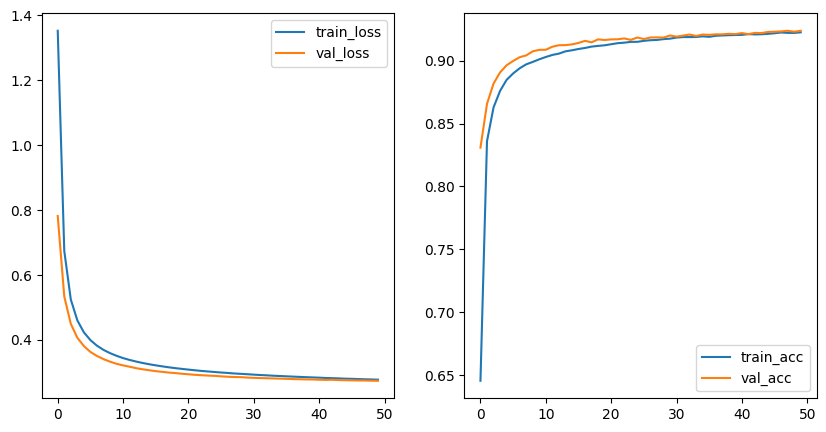

In [14]:
# construcción de un data.frame
df_train=pd.DataFrame(history.history)
df_train['epochs']=history.epoch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df_train['epochs'], df_train['loss'], label='train_loss')
ax1.plot(df_train['epochs'], df_train['val_loss'], label='val_loss')

ax2.plot(df_train['epochs'], df_train['accuracy'], label='train_acc')
ax2.plot(df_train['epochs'], df_train['val_accuracy'], label='val_acc')

ax1.legend()
ax2.legend()
plt.show()

Si nos fijamos en la curvas de pérdida, la de entrenamiento está por encima de la de validación. Esto hecho, aunque posible, pero no suele ser usual ya que, generalmente, la red se ajusta mejor a los datos de entrenamiento.
Adicionalmente, es importante destacar que, tras 50 épocas el proceso de convergencia de la red no ha llegado a su fin (curvas de loss y accuracy no son completamente planas).

Por último, se evalua el desempeño del modelo en la muestra de test.

In [15]:
loss_test, acc_test = model_funcional.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.9220


313/313 [==============================] - 0s 1ms/step


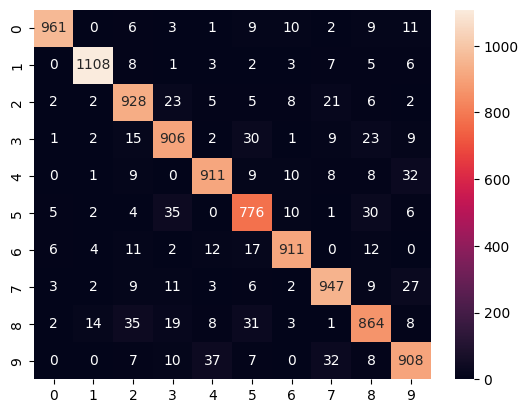

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_test_pred = np.argmax(model_funcional.predict(X_test), axis=1) # predicción de la muestra test - en formato etiqueta
Y_test_label = np.argmax(Y_test, axis=1) # muestra test en formato etiqueta
sns.heatmap(confusion_matrix(Y_test_pred, Y_test_label), annot = True, fmt='.0f') # matriz de confusión
plt.show()

Como puede verse, el accuracy en la muestra de test es similar al obtenido en la muestra de entrenamiento y validación. Asimismo, se observa en matriz de confusión como la clasificación de los diez dígitos tiene un elevado grado de acierto. 

## 2. Mejorando la red neuronal

Se ha visto que la red neuronal anterior tiene una buena bondad de ajuste (por encima del 90%) y un número de parámetros un 20% inferior a los datos de partida. A pesar de que podríamos decir que es un muy buen modelo, es posible mejorar el modelo empleando:
- Más capas ocultas: manteniendo siempre una proporcionalidad entre parámetros/datos y evitando el sobreentrenamiento
- Funciones de activación: probaremos la función *ReLu* (la más apropiada para modelos con múltiples capas ocultas)
- Inicialización de los pesos: suele emplearse la inialización de Xavier/Glorot (por defecto en *tf.keras*) pero hay otras como inicialización aleatoria, normalizada, Lecun, etc.
- Optimizadores: Adam (utilizado en la mayor parte de los problemas de deep learning), AdaGrad, RMSProp, etc. 

Por contra, muchas veces al entrenar el modelo se cae en el sobreajuste de los datos. Para evitarlo, se emplean técnicas de parada temprana o de regularización. Las técnicas de regularización más comunes son:
- Dropout: eliminación al azar de algunas de las neuronas de la red en el entrenamiento por lotes (para la predicción se usan todas las neuronas)
- L1, L2, Elastic Net: modificación de la función de pérdida en función de un factor dependiendo de los pesos de la red (norma, cuadrado o combianción de las dos, respectivamente)

Finalmente, la búsqueda de los parámetros más adecuados para el problema es un hecho diferenciador a la hora de encontrar la máxima bondad de ajuste. Si se tiene cierto conocimiento sobre el ámbito del proyecto puede ser de gran utilidad una búsqueda "fina" de forma aleatoria, pero se recomienda que el usuario monitoriza la modificación de los parámetros:
- Arquitectura de la red (número de capas, neuronas o función de activación)
- Número de épocas o tamaño del batch
- Diferentes técnicas de regularización

Una vez comentados los aspectos teóricos, se procede a realizar diferentes propuestas para mejorar el modelo anterior que lo utilizaremos como base; es decir, si no se mejora la bondad de ajuste serán rechazadas las diferentes propuestas.

### 2.1 Propuestas de mejora

#### 2.1.1. Aumento de capas ocultas y optimizador de Adam

Se incorporan dos capas ocultas de 8 neuronas y función de activación *ReLu* (salvo en la capa de salida). Asimismo, se empleará *Adam* como optimizador.

In [17]:
# dropout=0.2

model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(remodelado,)))
model_1.add(tf.keras.layers.Dense(units=8, activation='relu'))
# model_1.add(tf.keras.layers.Dropout(dropout))
model_1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=num_clase, activation='softmax'))

Como puede verse en la tabla resumen, el número de parámetros ha aumentado ligeramente al incluir dos capas intermedias más.

In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,858
Trainable params: 12,858
Non-trainable params: 0
_________________________________________________________________


Se compila y se hace el entrenamiento de este nuevo modelo.

In [19]:
model_1.compile(optimizer='adam', 
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

epoca = 50
lote = 128
validacion = 0.2 

history = model_1.fit(X_train, Y_train, 
                    batch_size = lote, 
                    epochs = epoca, 
                    validation_split = validacion, 
                    verbose = 1)

Epoch 1/50
375/375 [==============================] - 2s 2ms/step - loss: 1.0700 - accuracy: 0.6382 - val_loss: 0.4781 - val_accuracy: 0.8656
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.8767 - val_loss: 0.3435 - val_accuracy: 0.9030
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.9055 - val_loss: 0.2897 - val_accuracy: 0.9174
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.9194 - val_loss: 0.2617 - val_accuracy: 0.9253
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2535 - accuracy: 0.9282 - val_loss: 0.2490 - val_accuracy: 0.9306
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2308 - accuracy: 0.9349 - val_loss: 0.2347 - val_accuracy: 0.9345
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2108 - accuracy: 0.9411 - val_loss: 0.2292 - val_accuracy: 0.9367
Epoch 

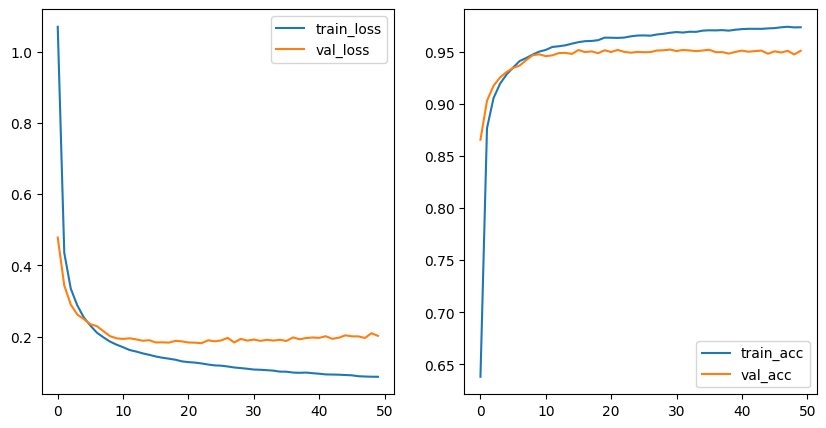

In [20]:
# construcción de un data.frame
df_train=pd.DataFrame(history.history)
df_train['epochs']=history.epoch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df_train['epochs'], df_train['loss'], label='train_loss')
ax1.plot(df_train['epochs'], df_train['val_loss'], label='val_loss')

ax2.plot(df_train['epochs'], df_train['accuracy'], label='train_acc')
ax2.plot(df_train['epochs'], df_train['val_accuracy'], label='val_acc')

ax1.legend()
ax2.legend()
plt.show()

Como puede verse, la red empieza a sobreajustar desde las primeras épocas pero, a la vista del resultado en la muestra de test, el modelo tiene una alta capacidad predictiva.

In [21]:
loss_test, acc_test = model_1.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9528


Se deja al alumno la creación de un modelo con una capa de dropout (descomentar las líneas de código de la arquitectura).

#### 2.1.2 Regularización de los pesos de la red

Se incorpora la regularización L2 a las capas de 8 neuronas. El valor de la regularización será de 0.01.

In [22]:
l2_value=0.01

model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(remodelado,)))
model_2.add(tf.keras.layers.Dense(units=8, 
                                 activation='relu',
                                 kernel_regularizer=tf.keras.regularizers.l2(l2_value)))
model_2.add(tf.keras.layers.Dense(units=8, 
                                 activation='relu',
                                 kernel_regularizer=tf.keras.regularizers.l2(l2_value)))
model_2.add(tf.keras.layers.Dense(units=num_clase, activation='softmax'))

Puede verse que el número de capas y los parámetros del modelo son los mismos que en la primera propuesta.

In [23]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 10)                90        
                                                                 
Total params: 12,858
Trainable params: 12,858
Non-trainable params: 0
_________________________________________________________________


Se compila y se hace el entrenamiento de esta nueva propuesta. En este caso, también se emplea *Adam* como optimizador.

In [24]:
model_2.compile(optimizer='adam', 
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

epoca = 50
lote = 128
validacion = 0.2 

history = model_2.fit(X_train, Y_train, 
                    batch_size = lote, 
                    epochs = epoca, 
                    validation_split = validacion, 
                    verbose = 1)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 1.3504 - accuracy: 0.6063 - val_loss: 0.6857 - val_accuracy: 0.8558
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6028 - accuracy: 0.8726 - val_loss: 0.5039 - val_accuracy: 0.8999
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.9013 - val_loss: 0.4439 - val_accuracy: 0.9147
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.9114 - val_loss: 0.4137 - val_accuracy: 0.9215
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.9173 - val_loss: 0.3906 - val_accuracy: 0.9261
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.9210 - val_loss: 0.3692 - val_accuracy: 0.9296
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3762 - accuracy: 0.9248 - val_loss: 0.3624 - val_accuracy: 0.9291
Epoch 

Puede verse que al aplicar la regularización, se consigue un menor sobreajuste en el modelo y una mejor convergencia. Por su parte, la bondad de ajuste en la muestra de test sigue siendo superior al modelo que se ha tomado como base.

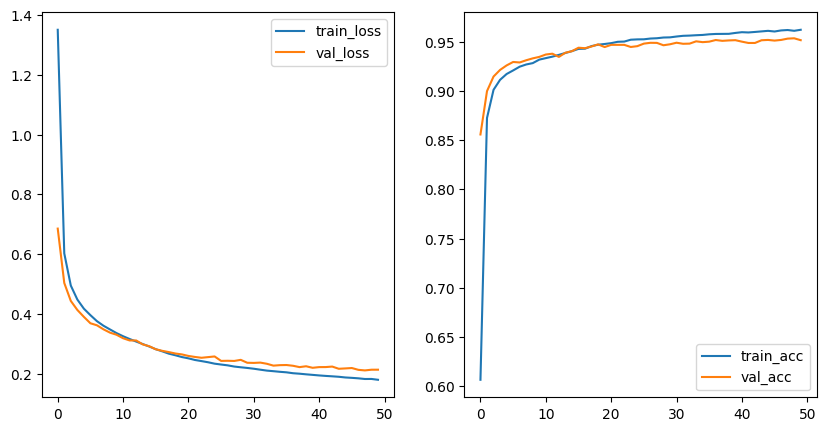

In [25]:
# construcción de un data.frame
df_train=pd.DataFrame(history.history)
df_train['epochs']=history.epoch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df_train['epochs'], df_train['loss'], label='train_loss')
ax1.plot(df_train['epochs'], df_train['val_loss'], label='val_loss')

ax2.plot(df_train['epochs'], df_train['accuracy'], label='train_acc')
ax2.plot(df_train['epochs'], df_train['val_accuracy'], label='val_acc')

ax1.legend()
ax2.legend()
plt.show()

In [26]:
loss_test, acc_test = model_2.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9493


#### 2.2.3 Uso de la parada temprana

Para esta propuesta, se emplea la parada temprana durante el proceso de entrenamiento de la arquitectura del punto 2.2.1.

In [27]:
# SGD - modificación de tasa de aprendizaje y momento
own_sgd=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

# definición del callback - parada temprana 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) 

Como puede verse, también han sido modificados los parámetros por defecto del compilador (lr=0.03 y momento=0.9). Por su parte, el entrenamiento del modelo parará en el momento en que la pérdida de validación aumente durante cinco épocas.

Se vuelve a defininir la arquitectura y se realiza el proceso de entrenamiento:

In [28]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(remodelado,)))
model_1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=num_clase, activation='softmax'))

model_1.compile(optimizer=own_sgd, 
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

epoca = 50
lote = 128
validacion = 0.2 

history = model_1.fit(X_train, Y_train, 
                    batch_size = lote, 
                    epochs = epoca, 
                    validation_split = validacion, 
                    callbacks = callback,
                    verbose = 1)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.8239 - accuracy: 0.7274 - val_loss: 0.3493 - val_accuracy: 0.8960
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3029 - accuracy: 0.9122 - val_loss: 0.2488 - val_accuracy: 0.9271
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.9278 - val_loss: 0.2334 - val_accuracy: 0.9326
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2184 - accuracy: 0.9367 - val_loss: 0.2670 - val_accuracy: 0.9228
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9395 - val_loss: 0.2185 - val_accuracy: 0.9392
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1944 - accuracy: 0.9429 - val_loss: 0.2091 - val_accuracy: 0.9400
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1807 - accuracy: 0.9467 - val_loss: 0.1927 - val_accuracy: 0.9448
Epoch 

Terminado el entrenamiento, se visualiza el proceso hasta la parada temprana. 

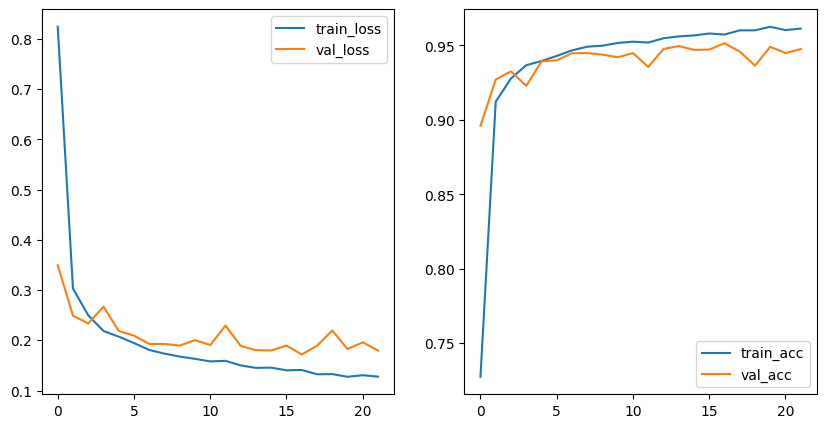

In [29]:
# construcción de un data.frame
df_train=pd.DataFrame(history.history)
df_train['epochs']=history.epoch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df_train['epochs'], df_train['loss'], label='train_loss')
ax1.plot(df_train['epochs'], df_train['val_loss'], label='val_loss')

ax2.plot(df_train['epochs'], df_train['accuracy'], label='train_acc')
ax2.plot(df_train['epochs'], df_train['val_accuracy'], label='val_acc')

ax1.legend()
ax2.legend()
plt.show()

In [30]:
loss_test, acc_test = model_1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9469


Se observa además que la bondad de ajuste del modelo es 

#### 2.2.4 Guardar de modelos

Tras explicar la creación de redes neuronales en *tf.keras*, se indica el proceso seguido para guardar modelos:

In [49]:
import joblib

joblib.dump(model_funcional, 'model.joblib')

['model.joblib']

In [50]:
new_model = joblib.load("model.joblib")

In [51]:
y_pred_funcional = model_funcional.predict(X_test)
y_pred_new_model = new_model.predict(X_test)

print(y_pred_funcional[0]) 
print(y_pred_new_model[0])

313/313 [==============================] - 0s 985us/step
[2.6529275e-05 1.2445823e-09 8.9682784e-05 2.8816597e-03 5.0556758e-07
 1.2308407e-05 1.1708685e-09 9.9663085e-01 1.3788063e-05 3.4466313e-04]
[2.6529275e-05 1.2445823e-09 8.9682784e-05 2.8816597e-03 5.0556758e-07
 1.2308407e-05 1.1708685e-09 9.9663085e-01 1.3788063e-05 3.4466313e-04]


A pesar de que se recomienda guardar el modelo de la forma anterior, también nos puede interesar únicamente guardar la arquitectura o los pesos de la red. Para guardar la arquitectura se emplea la siguiente sintaxis:

In [52]:
config = model_funcional.get_config() # obtención de la configuración del modelo
reinitialized_model = tf.keras.Model.from_config(config) 

y_pred_funcional = model_funcional.predict(X_test)
y_pred_reinitialized_model = reinitialized_model.predict(X_test)

print(y_pred_funcional[0]) 
print(y_pred_reinitialized_model[0])

313/313 [==============================] - 0s 1ms/step
[2.6529275e-05 1.2445823e-09 8.9682784e-05 2.8816597e-03 5.0556758e-07
 1.2308407e-05 1.1708685e-09 9.9663085e-01 1.3788063e-05 3.4466313e-04]
[0.1668149  0.0558457  0.08458909 0.08804262 0.10846657 0.08671045
 0.05887654 0.06828258 0.16930974 0.11306179]


Como puede verse, como solo se ha guardado la arquitectura del modelo, las predicciones ahora son diferentes pues no se dispone de la información aprendida previamente durante el entrenamiento. Por último, con el siguiente código se guardan los pesos de la red.

In [53]:
weights = model_funcional.get_weights() # Recupera el estado del modelo (matriz de pesos en formato lista - array de numpy)

Para acceder a los pesos de cada capa se accede al elemento de la lista.

In [54]:
weights[0]  # pesos de la primera capa

array([[-0.02648553,  0.00943715, -0.03061545, ..., -0.0670075 ,
         0.05844383, -0.01202986],
       [-0.0753365 ,  0.00045518, -0.0071649 , ...,  0.05468605,
        -0.02050772,  0.06294054],
       [-0.00201073, -0.02249756, -0.01658054, ...,  0.08425236,
        -0.07272678,  0.08207789],
       ...,
       [-0.00405737,  0.05973056, -0.01607496, ..., -0.04693831,
        -0.08087471, -0.01063113],
       [-0.00105193, -0.05151645, -0.01154517, ...,  0.08658043,
         0.00123717, -0.00699268],
       [ 0.04350351, -0.06878642, -0.03474742, ..., -0.0167098 ,
        -0.05609927,  0.02649511]], dtype=float32)